<a href="https://colab.research.google.com/github/AryanKilaru/cs666student/blob/main/Aryan_02022499_CS666_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

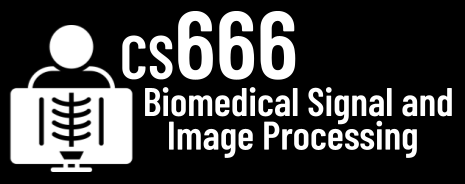
#Assignment 4

In [76]:
# NAME: Aryan Rao Kilaru

In [77]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia and covid in xrays!

In [78]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['number', 'clf', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [79]:
# we are using mahotas again, so lets install it!
!pip install mahotas

In [80]:
# our imports include sklearn this time
import mahotas as mh
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [81]:
# Please download this file: https://cs666.org/data/xray/ with the wget command!
# Note: Please use the forwarded dropbox link and change dl=0 to dl=1!
# This is a subset of the Kaggle Pneumonia + Covid Datasets!

In [82]:
!wget https://www.dropbox.com/s/2ca2889o2ql8n4e/xray.zip?dl=1

--2024-03-30 22:28:05--  https://www.dropbox.com/s/2ca2889o2ql8n4e/xray.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/2ca2889o2ql8n4e/xray.zip [following]
--2024-03-30 22:28:05--  https://www.dropbox.com/s/dl/2ca2889o2ql8n4e/xray.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4b467eb064a8722dddce748511.dl.dropboxusercontent.com/cd/0/get/CQHFrY3iAfuiothVoJsKwh_W9FlOJerPiZ12TwDAa8vklK7PeG9YDDdX9_ATmIJYLva-xrvoZSrDxztBF4hoWENympyd45ykwzcEtZpNQ32Uo7FODyxQtqKyIt0O6p0Po-QZa9-LJFvPqyjNcFZJmQhY/file?dl=1# [following]
--2024-03-30 22:28:06--  https://uc4b467eb064a8722dddce748511.dl.dropboxusercontent.com/cd/0/get/CQHFrY3iAfuiothVoJsKwh_W9FlOJerPiZ12TwDAa8vklK7PeG9YDDdX9_ATmIJYLva-xrvoZSrDxztBF4hoWENympyd45ykwzcEtZpNQ32Uo7FO

In [83]:
# Run this code to extract the zip file and to create
# the folder structure of normal/, pneumonia/, and covid/ images.
# Each folder contains the first images of the Kaggle datasets.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'
COVID_DIR = 'covid/'

In [84]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [85]:
# TODO: Please display this image and print the dimensions!

The images dimensions are(1858, 2090)


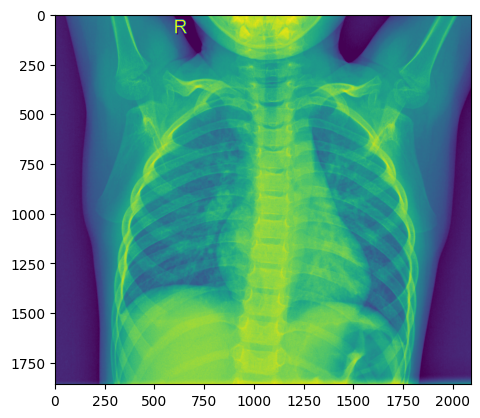

In [86]:
# TODO: YOUR CODE
plt.imshow(img)
print(f'The images dimensions are{img.shape}')

**Task 2:** Let's do some data wrangling and more visualization! [30 Points]

In [87]:
folders = [NORMAL_DIR, PNEUMONIA_DIR, COVID_DIR]
data = [[],[],[]]

for f_index,f in enumerate( folders ):
  all_files = os.listdir( f )

  data[f_index] = np.zeros( (len(all_files), 300, 300), dtype=np.float32)

  for i in range(len(all_files)):
    loaded_image = mh.imread( f + '/' + all_files[i] )
    if loaded_image.ndim > 2:
      loaded_image = mh.colors.rgb2gray(loaded_image[:,:,:3])

    loaded_image = mh.imresize( loaded_image, (300, 300) )
    img_shape = loaded_image.shape

    data[f_index][ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [88]:
# The two code blocks above perform 3 data wrangling operations.
# Which ones?
# Hint: The first two might be more obvious but the third one happens in the
# last line.

# TODO: Operation 1) YOUR ANSWER
# loaded_image = mh.colors.rgb2gray(loaded_image[:,:,:3])
# We read the image from normal, pneumonia and covid and we change the color.

# TODO: Operation 2) YOUR ANSWER
# loaded_image = mh.imresize( loaded_image, (300, 300) )
# we resize to the dimensions 300*300

# TODO: Operation 3) YOUR ANSWER
# data[f_index][ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image
# The last line of the code helps to fill the matrics by giving specified location

In [89]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

In [90]:
# TODO: YOUR CODE

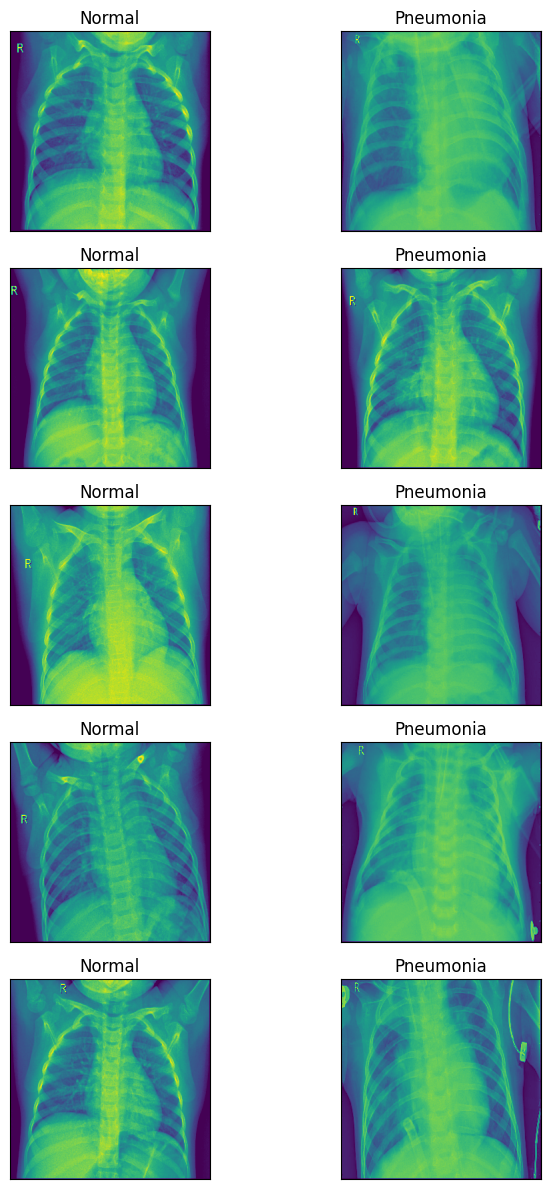

In [91]:
fig, axs = plt.subplots(5, 2, figsize=(8, 12))

# plot normal images
for i in range(5):
    axs[i, 0].imshow(data[0][i])
    axs[i, 0].set_title('Normal')

# plot pneumonia images
for i in range(5):
    axs[i, 1].imshow(data[1][i])
    axs[i, 1].set_title('Pneumonia')

# remove the axis ticks and labels
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])


plt.tight_layout()
plt.show()

**Task 3:** Setup training and testing data. [15 Points]

In [92]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays, pneumonia xrays, and covid xrays.
#
# The training data X_train will include 180 images (60 normal, 60 pneumonia, 60 covid).
# The testing data X_test will include the remaining 120 images (40 normal, 40 pneumonia, 40 covid).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the y_train vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia, and 2 for a covid scan.

In [93]:
TRAINING_COUNT = 60

X_train = np.zeros( (TRAINING_COUNT * 3, 300*300 ), dtype=np.float32)
t_pos = 0

for d in data:
  for image in d[0:TRAINING_COUNT]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_train[t_pos] = image
    t_pos += 1

In [95]:
# TODO: Please create the y_train vector with 0 for a normal image,
# 1 for a pneumonia, and 2 for covid. This needs to a numpy array.
y_train = np.concatenate((np.zeros(60, dtype=int), np.ones(60, dtype=int), np.full(60, 2, dtype=int)))

In [96]:
TESTING_COUNT = 40

X_test = np.zeros( (TESTING_COUNT * 3, 300*300 ), dtype=np.float32)
t_pos = 0

for d in data:
  for image in d[0:TESTING_COUNT]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_test[t_pos] = image
    t_pos += 1

In [97]:
# TODO: Please create the y_test vector with 0 for a normal image,
# 1 for a pneumonia, and 2 for covid. This needs to a numpy array.
y_test= np.concatenate((np.zeros(40, dtype=int), np.ones(40, dtype=int), np.full(40, 2, dtype=int)))

**Task 4:** Let's train and evaluate the Random Forest! [30 Points]

In [98]:
# Let's shuffle our training data.
p = np.random.permutation(len(X_train))
X_train = X_train[p]
y_train = y_train[p]

In [99]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [100]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is
# normal or pneumonia or covid.
fitted = clf.fit( X_train, y_train )

In [102]:
# TODO: In just a few sentences, please explain how the Random Forest works.

In [101]:
# TODO: YOUR ANSWER
print("A Random Forest is like a group decision-making team in machine learning. It combines the opinions of many “trees” (individual models) to make better predictions, creating a more robust and accurate overall model.")

A Random Forest is like a group decision-making team in machine learning. It combines the opinions of many “trees” (individual models) to make better predictions, creating a more robust and accurate overall model.


In [103]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( X_test, y_test )

1.0

In [104]:
# TODO: Is the classification accuracy good? And, are you surprised?

In [105]:
# TODO: YOUR ANSWER
print("Yes, we can see a 100% accuracy and it is surprising to achieve this on a small data.")

Yes, we can see a 100% accuracy and it is surprising to achieve this on a small data.


**Task 5:** Now, let's decrease the number of trees! [10 Points]

In [106]:
# How many trees are used in Task 4?

In [115]:
# TODO: YOUR ANSWER
from sklearn.ensemble import RandomForestClassifier

clf_default = RandomForestClassifier()

num_trees_default = clf_default.n_estimators
print(f"Number of trees used in Task 4: {num_trees_default}")

Number of trees used in Task 4: 100


In [108]:
# Now, please use a single tree and observe the testing performance.

In [120]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

p = np.random.permutation(len(X_train))
X_train, y_train = X_train[p], y_train[p]

clf_single_tree = RandomForestClassifier(n_estimators=1)

clf_single_tree.fit(X_train, y_train)

accuracy_single_tree = clf_single_tree.score(X_test, y_test)

print(f"Testing accuracy with a single tree: {accuracy_single_tree}")

Testing accuracy with a single tree: 0.925


In [ ]:
# Are you surprised?

In [121]:
# TODO: YOUR ANSWER
print("Using a single tree gave a accuracy of 92.5% which is not bad. This shows the effectivenes of using Random Forest Trees in general.")
print("We can also see that the complexity of this problem is not high as we are able to achieve a 92.5% accuracy with just one tree.")

Using a single tree gave a accuracy of 92.5% which is not bad. This shows the effectivenes of using Random Forest Trees in general.
We can also see that the complexity of this problem is not high as we are able to achieve a 92.5% accuracy with just one tree.


**Bonus:** Let's take a closer look! [33 Points]

In [122]:
# Let's run the fitted classifier on the remaining covid images.
# You might have noticed that there are 199 covid images but we only used 100 so far.
# Please evaluate the classifier on the remaining (previously unseen) 99 covid images
# and check the performance.

In [123]:
# TODO: YOUR CODE AND YOUR ANSWER
X_test_covid_only = np.zeros( (99, 300*300 ), dtype=np.float32)

In [124]:
number = 0

for img in data[2][100:]:
  img= img.ravel()
  img /= img.max()
  X_test_covid_only[number] = img
  number += 1

In [125]:
clf.score(X_test_covid_only, [2]*99 )

0.9393939393939394

In [127]:
print("We achieve a classifier score of 93.94%)")

We achieve a classifier score of 93.94%)


In [128]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(X_test_covid_only) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

In [129]:
# TODO: YOUR CODE AND YOUR ANSWER
# Because these images are not covid so they failed the classifier.

In [130]:
predict = clf.predict(X_test_covid_only)

In [131]:
predict

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [132]:
wrong_class= np.where(predict != 2)
wrong_class

(array([12, 32, 47, 59, 60, 81]),)

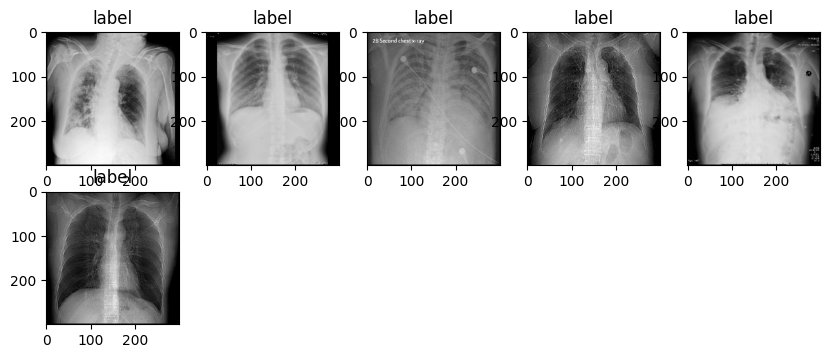

In [133]:
plt.figure(figsize=(10, 10))
for idx, i in enumerate(wrong_class[0]):
    plt.subplot(5, 5, idx+1)
    plt.imshow(X_test_covid_only[i].reshape(300, 300), cmap='gray')
    plt.axis('on')
    plt.title('label')

plt.show()

In [134]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw